In [10]:
import pandas as pd
data = pd.read_csv('GenZ_DatingApp_Data.csv')
print('Dataset overview:')
print(data.info())
data.head()


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication 

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [4]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

In [20]:
missing_values_per_column = data.isnull().sum()
print(missing_values_per_column)


User_ID                    0
Age                        0
Gender                     0
Location                   0
Education                  0
Occupation                 0
Primary_App                0
Secondary_Apps             0
Usage_Frequency            0
Daily_Usage_Time           0
Reason_for_Using           0
Satisfaction               0
Challenges                 0
Desired_Features           0
Preferred_Communication    0
Partner_Priorities         0
dtype: int64


In [18]:
data['Challenges'] = data['Challenges'].fillna(data['Challenges'].mode()[0])
data['Primary_App'] = data['Primary_App'].fillna(data['Primary_App'].mode()[0])
data['Secondary_Apps'] = data['Secondary_Apps'].fillna(data['Secondary_Apps'].mode()[0])

In [26]:
# Does gender influence dating app preferences?
# We'll try to answer this question by giving more details on the dataset;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "GenZ_DatingApp_Data.csv" 
data = pd.read_csv('GenZ_DatingApp_Data.csv')


In [28]:
# Drop rows where Primary_App is NaN since we are analyzing preferences
data = data.dropna(subset=["Primary_App"])

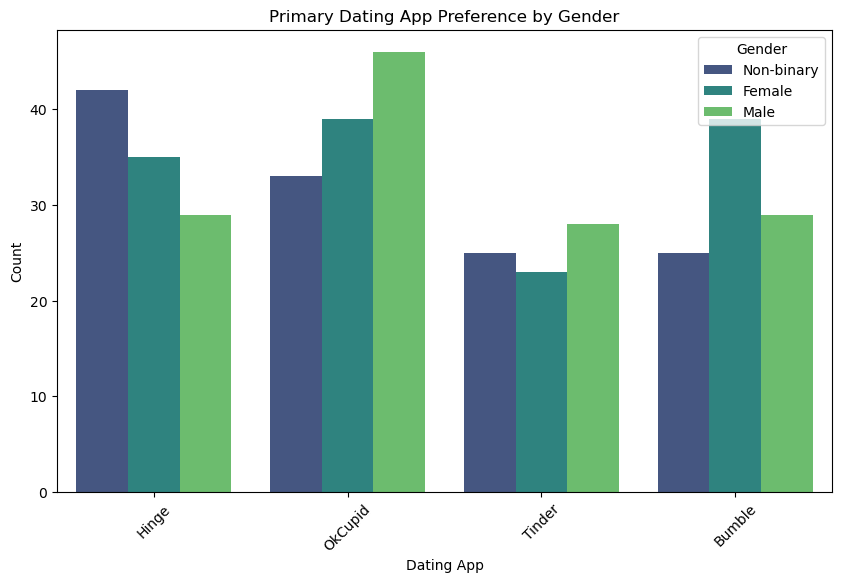

In [30]:
# This plot give the count of Primary Apps by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Primary_App", hue="Gender", palette="viridis")
plt.title("Primary Dating App Preference by Gender")
plt.xticks(rotation=45)
plt.xlabel("Dating App")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

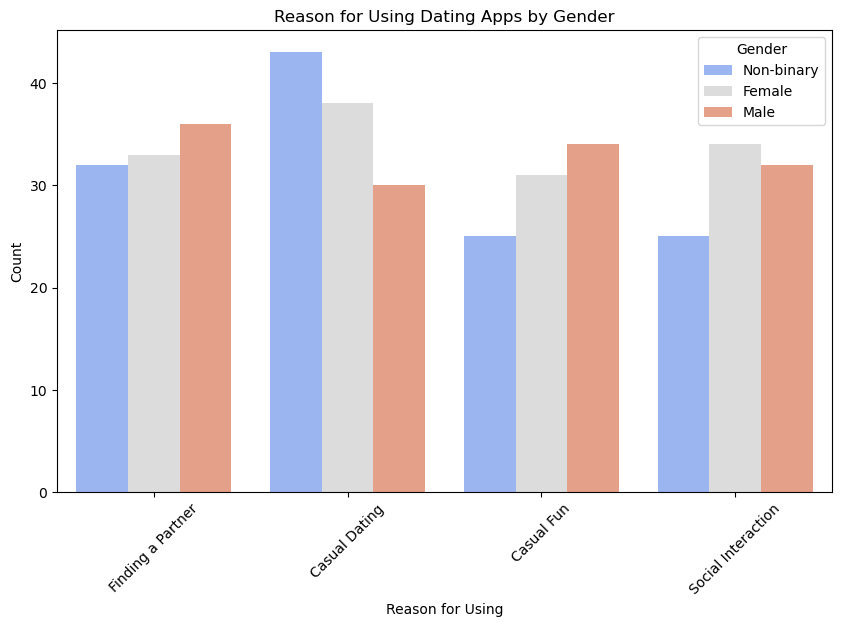

In [32]:
# This plot give the reason for Using Dating Apps by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Reason_for_Using", hue="Gender", palette="coolwarm")
plt.title("Reason for Using Dating Apps by Gender")
plt.xticks(rotation=45)
plt.xlabel("Reason for Using")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

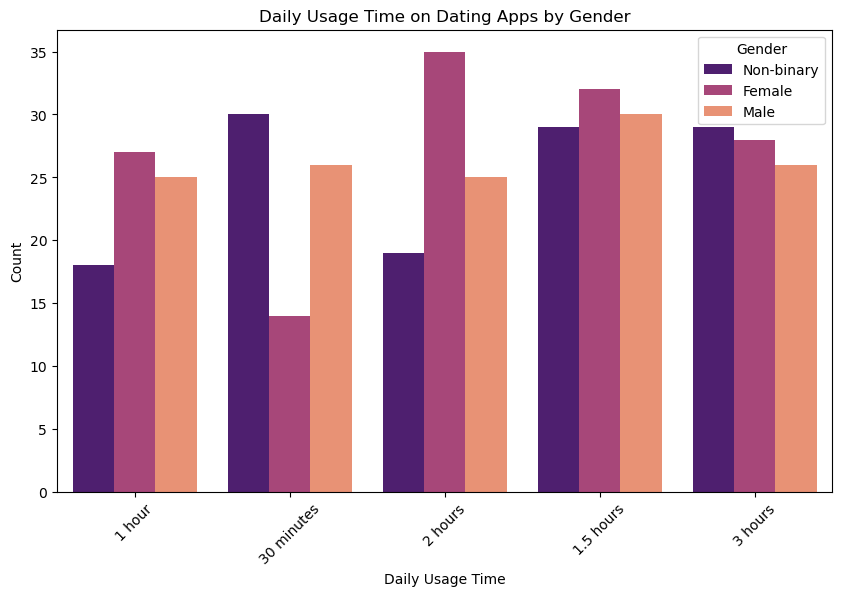

In [34]:
# This plot give the daily Usage Time by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Daily_Usage_Time", hue="Gender", palette="magma")
plt.title("Daily Usage Time on Dating Apps by Gender")
plt.xticks(rotation=45)
plt.xlabel("Daily Usage Time")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

In [36]:
# Print summary statistics
gender_summary = data.groupby("Gender")["Primary_App"].value_counts().unstack().fillna(0)
print("\nPrimary Dating App Preference by Gender:\n", gender_summary)



Primary Dating App Preference by Gender:
 Primary_App  Bumble  Hinge  OkCupid  Tinder
Gender                                     
Female           39     35       39      23
Male             29     29       46      28
Non-binary       25     42       33      25


In [40]:
# Are people using multiple dating apps simultaneously?

# Analyzing multiple dating apps use
data["Using_Multiple_Apps"] = data["Secondary_Apps"].apply(lambda x: x != "None")
multi_app_usage = data["Using_Multiple_Apps"].value_counts(normalize=True) * 100



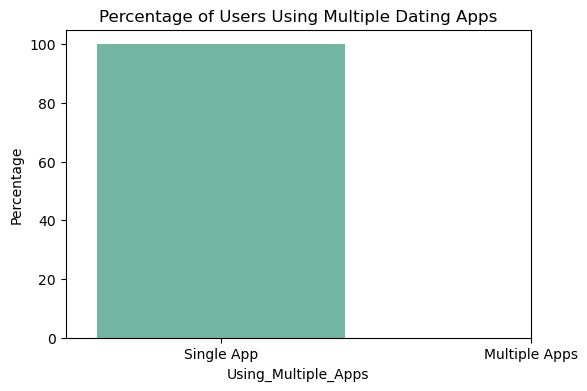


Percentage of users using multiple dating apps:
 Using_Multiple_Apps
True    100.0
Name: proportion, dtype: float64


In [44]:
# Plot multiple app usage
plt.figure(figsize=(6, 4))
sns.barplot(x=multi_app_usage.index, y=multi_app_usage.values, hue=multi_app_usage.index, palette="Set2", legend=False)
plt.xticks([0, 1], ["Single App", "Multiple Apps"])
plt.title("Percentage of Users Using Multiple Dating Apps")
plt.ylabel("Percentage")
plt.show()

print("\nPercentage of users using multiple dating apps:\n", multi_app_usage)

In [46]:
# Which age group is most active on dating apps?
# Let's analyze by the group age activity
data["Age_Group"] = pd.cut(data["Age"], bins=[18, 24, 30, 40, 50, 60], labels=["18-24", "25-30", "31-40", "41-50", "51-60"])
age_activity = data["Age_Group"].value_counts().sort_index()

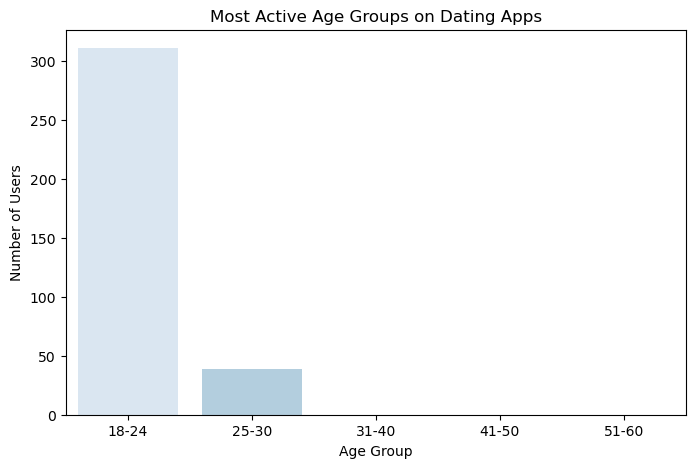


Number of users per age group:
 Age_Group
18-24    311
25-30     39
31-40      0
41-50      0
51-60      0
Name: count, dtype: int64


In [50]:
# Plot age group activity
plt.figure(figsize=(8, 5))
sns.barplot(x=age_activity.index, y=age_activity.values, hue=age_activity.index, palette="Blues")
plt.title("Most Active Age Groups on Dating Apps")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

print("\nNumber of users per age group:\n", age_activity)

In [82]:
# Do people in urban vs. rural areas show different usage patterns?

# Urban vs Rural patterns
file_path = "GenZ_DatingApp_Data.csv"  # Ensure correct file path
data = pd.read_csv('GenZ_DatingApp_Data.csv')

print("Dataset Columns:", data.columns)

if "Location_Type" in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x="Usage_Frequency", hue="Location_Type", palette="pastel")
    plt.title("Dating App Usage Frequency: Urban vs. Rural")
    plt.xlabel("Usage Frequency")
    plt.ylabel("Count")
    plt.legend(title="Location Type")
    plt.show()

Dataset Columns: Index(['User_ID', 'Age', 'Gender', 'Location', 'Education', 'Occupation',
       'Primary_App', 'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Satisfaction', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')
